In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pickle

# TESTING DIFFERENT MODELS AND FEATURE EXTRACTION

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/PC503_project/data/main_data_houses.xlsx')

In [ ]:
data.shape

(10764, 15)

In [ ]:
data = data.drop(['Unnamed: 0', 'id'], axis = 1)
data.head()

,bed,bath,reception,terrace,house,flat,bungalow,tenure,lat,lon,ch,dg,price
0,2,1,1,1,1,0,0,Freehold,52.517835,-1.857425,1,1,170000
1,2,2,1,0,0,1,0,Leasehold,52.486527,-1.900266,0,0,220000
2,4,1,1,1,1,0,0,Freehold,52.453875,-1.908403,1,1,365000
3,3,1,1,0,1,0,0,Freehold,52.418401,-1.909689,1,1,320000
4,2,2,1,0,0,1,0,Leasehold,52.449617,-1.890636,1,1,200000


In [ ]:
data.tenure.unique()

array(['Freehold', 'Leasehold', 'Not available', 'Share of freehold'],
      dtype=object)

In [ ]:
# tenure categorical to numerical
tenure_data = {'Freehold':0, 'Leasehold':1, 'Not available':2, 'Share of freehold':0}

data['tenure'] = data['tenure'].replace(tenure_data.keys(), tenure_data.values())
data.head()

,bed,bath,reception,terrace,house,flat,bungalow,tenure,lat,lon,ch,dg,price
0,2,1,1,1,1,0,0,0,52.517835,-1.857425,1,1,170000
1,2,2,1,0,0,1,0,1,52.486527,-1.900266,0,0,220000
2,4,1,1,1,1,0,0,0,52.453875,-1.908403,1,1,365000
3,3,1,1,0,1,0,0,0,52.418401,-1.909689,1,1,320000
4,2,2,1,0,0,1,0,1,52.449617,-1.890636,1,1,200000


In [ ]:
data.columns

Index(['bed', 'bath', 'reception', 'terrace', 'house', 'flat', 'bungalow',
       'tenure', 'lat', 'lon', 'ch', 'dg', 'price'],
      dtype='object')

In [ ]:
x = data[['bed', 'bath', 'reception','house', 'flat', 'bungalow', 'lat', 'lon']]

# ['bed', 'bath', 'reception', 'terrace', 'house', 'flat', 'bungalow', 'tenure', 'lat', 'lon', 'ch', 'dg']

y = data['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

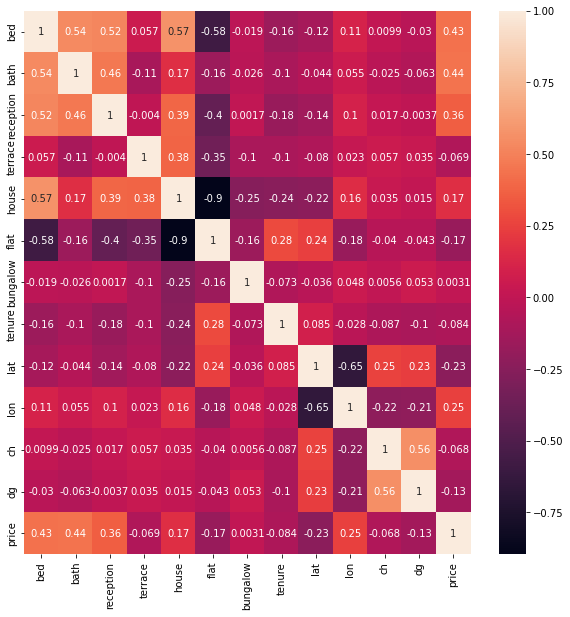

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

## Linear Regression

In [ ]:
# lr = LinearRegression().fit(x.iloc[:200], y.iloc[:200])
lr = LinearRegression().fit(X_train, y_train)
# rmse_lr = sklearn.metrics.mean_squared_error(lr.predict(x.iloc[:100]), y.iloc[:100])
# rmse_lr

clf = Ridge(alpha=2**-4)
clf.fit(x.iloc[:500], y.iloc[:500])
pd.DataFrame([lr.predict(X_test), y_test]).T

,0,1
0,5.154013e+05,130000.0
1,2.650727e+05,500000.0
2,4.159538e+05,300000.0
3,4.872855e+05,325000.0
4,2.142664e+06,6950000.0
...,...,...
3548,3.742239e+05,265000.0
3549,4.234820e+05,425000.0
3550,3.876376e+05,400000.0
3551,3.615635e+05,189950.0


In [ ]:
pd.DataFrame([lr.predict(x.iloc[:500]), y.iloc[:500]]).T

,0,1
0,134424.611618,170000.0
1,307984.340606,220000.0
2,288749.647002,365000.0
3,289914.321334,320000.0
4,263536.308547,200000.0
...,...,...
495,532238.025828,349950.0
496,378259.376052,550000.0
497,301417.768073,295000.0
498,339561.210438,350000.0


In [ ]:
clf = Ridge(alpha=2**-4)
clf.fit(x.iloc[:500], y.iloc[:500])
pd.DataFrame([clf.predict(x.iloc[:500]), lr.predict(x.iloc[:500]), y.iloc[:500]]).T

,0,1,2
0,130744.086460,134424.611618,170000.0
1,293509.985217,307984.340606,220000.0
2,269206.939997,288749.647002,365000.0
3,297731.447226,289914.321334,320000.0
4,274199.922959,263536.308547,200000.0
...,...,...,...
495,492662.092816,532238.025828,349950.0
496,384981.873654,378259.376052,550000.0
497,299444.807512,301417.768073,295000.0
498,323789.163973,339561.210438,350000.0


In [ ]:
df_temp_x = pd.DataFrame()
df_temp_y = []

for _ in range(2000):
  r = random.randint(0, len(X_train)-1)
  df_temp_x = pd.concat([df_temp_x , X_train.iloc[r]], axis = 1)
  df_temp_y.append(y_train.iloc[r])

df_temp_y = np.array(df_temp_y)
df_temp_x = df_temp_x.T

lr2 = LinearRegression().fit(df_temp_x, df_temp_y)
rmse_lr2 = sklearn.metrics.mean_squared_error(lr2.predict(X_test), y_test)
rmse_lr2

114637694350.10835

In [ ]:
# lr2.predict(np.array(X_test.iloc[0]))
np.dot(lr2.coef_, np.array(X_test.iloc[99]).T), y_test[99]

(-613274.5180542705, 155000)

In [ ]:
degree=2
df_temp_x = pd.DataFrame()
df_temp_y = []

for _ in range(1000):
  r = random.randint(0, len(X_train)-1)
  df_temp_x = pd.concat([df_temp_x , X_train.iloc[r]], axis = 1)
  df_temp_y.append(y_train.iloc[r])

df_temp_y = np.array(df_temp_y)
df_temp_x = df_temp_x.T

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(df_temp_x,df_temp_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
rmse_pr = sklearn.metrics.mean_squared_error(polyreg.predict(X_test), y_test)

In [ ]:
rmse_pr

278139289897.765

# NEW

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/PC503_project/data/aberdeenshire_data_houses.xlsx')
data = data.drop(['Unnamed: 0', 'id'], axis = 1)
# tenure categorical to numerical
tenure_data = {'Freehold':0, 'Leasehold':1, 'Not available':2, 'Share of freehold':0}

data['tenure'] = data['tenure'].replace(tenure_data.keys(), tenure_data.values())

x = data[['bed', 'bath', 'reception', 'lat', 'lon', 'ch', 'dg']]

# ['bed', 'bath', 'reception', 'terrace', 'house', 'flat', 'bungalow', 'tenure', 'lat', 'lon', 'ch', 'dg']

y = data['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# lr = LinearRegression().fit(x.iloc[:200], y.iloc[:200])
lr = LinearRegression().fit(X_train, y_train)

clf = Ridge(alpha=2**-2)
clf.fit(X_train, y_train)

degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train, y_train)

# tree regressor
treg = DecisionTreeRegressor(random_state = 42)
treg.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

pd.DataFrame([lr.predict(X_test), clf.predict(X_test), treg.predict(X_test), lasso.predict(X_test),y_test]).T

,0,1,2,3,4
0,771778.031729,772163.692334,1250000.0,771780.793326,229995.0
1,157209.125589,157147.916539,93997.5,157207.942700,100000.0
2,216978.831589,216870.514867,389950.0,216975.125794,230000.0
3,144312.661428,144182.663322,185000.0,144312.086136,105000.0
4,127715.388630,127606.318962,75000.0,127712.740267,89000.0
...,...,...,...,...,...
233,200239.823884,200065.906513,90000.0,200236.879433,80000.0
234,210752.404918,210609.677386,135000.0,210752.017306,140000.0
235,123344.749699,123886.336119,52500.0,123349.932611,70000.0
236,-6481.839297,-6488.266817,75000.0,-6482.201124,43000.0


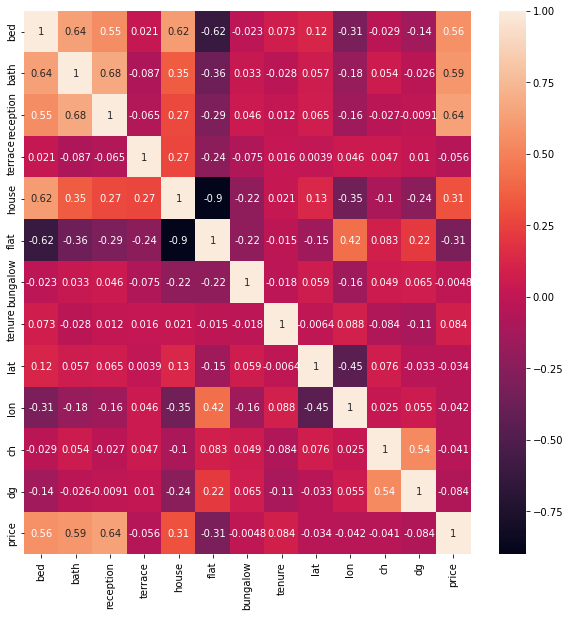

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

In [ ]:
sklearn.metrics.mean_squared_error(lr.predict(X_test), y_test), sklearn.metrics.mean_squared_error(treg.predict(X_test), y_test), sklearn.metrics.mean_squared_error(lasso.predict(X_test), y_test)

(148595072742.20746, 129785476228.97794, 148595620873.4635)

In [ ]:
filename = '/content/drive/MyDrive/PC503_project/Model/test_model.pkl'
with open('/content/drive/MyDrive/PC503_project/Model/model_pkl', 'wb') as files:
    pickle.dump(treg, files)

# Saving all models

In [4]:
cities = ['birmingham',
 'bristol',
 'buckinghamshire',
 'edinburgh',
 'glasgow',
 'gloucestershire',
 'hampshire',
 'liverpool',
 'london',
 'nottingham',
 'oxford',
 'sheffield',
 'aberdeenshire',
 'manchester']

for city in cities:
  print(city)
  data = pd.read_excel(f'/content/drive/MyDrive/PC503_project/data/{city}_data_houses.xlsx')
  data = data.drop(['Unnamed: 0', 'id'], axis = 1)
  # tenure categorical to numerical
  tenure_data = {'Freehold':0, 'Leasehold':1, 'Not available':2, 'Share of freehold':0}

  data['tenure'] = data['tenure'].replace(tenure_data.keys(), tenure_data.values())

  x = data[['bed', 'bath', 'reception', 'lat', 'lon', 'ch', 'dg']]

  # ['bed', 'bath', 'reception', 'terrace', 'house', 'flat', 'bungalow', 'tenure', 'lat', 'lon', 'ch', 'dg']

  y = data['price']

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

  # linear regression
  lr = LinearRegression().fit(X_train, y_train)

  # ridge regression
  clf = Ridge(alpha=2**-2)
  clf.fit(X_train, y_train)

  # plynomial regression
  # degree=3
  # polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
  # polyreg.fit(X_train, y_train)

  # tree regressor
  treg = DecisionTreeRegressor(random_state = 42)
  treg.fit(X_train, y_train)

  # lasso regressrion
  lasso = Lasso(alpha=0.5)
  lasso.fit(X_train, y_train)

  check = [sklearn.metrics.mean_squared_error(lr.predict(X_test), y_test), sklearn.metrics.mean_squared_error(clf.predict(X_test), y_test), sklearn.metrics.mean_squared_error(treg.predict(X_test), y_test), sklearn.metrics.mean_squared_error(lasso.predict(X_test), y_test)]

  min_error = np.array(check).argmin()

  filename = f'/content/drive/MyDrive/PC503_project/Model/{city}_model_pkl.pkl'

  if min_error == 0:
    # lr
    with open(filename, 'wb') as files:
      pickle.dump(lr, files)

  elif min_error == 1:
    # clf
    with open(filename, 'wb') as files:
      pickle.dump(clf, files)

  elif min_error == 2:
    # treg
    with open(filename, 'wb') as files:
      pickle.dump(treg, files)
  else:
    # lasso
    with open(filename, 'wb') as files:
      pickle.dump(lasso, files)

birmingham
bristol
buckinghamshire
edinburgh
glasgow
gloucestershire
hampshire
liverpool
london
nottingham
oxford
sheffield
aberdeenshire
manchester


In [7]:
X_test.iloc[0]

bed           2.000000
bath          2.000000
reception     1.000000
lat          53.474388
lon          -2.291680
ch            0.000000
dg            0.000000
Name: 506, dtype: float64

In [17]:
d = {'bed':3, 'bath':1, 'reception':1, 'lat':52.478308, 'lon': -1.893538, 'ch':1, 'dg':1}
lasso.predict([pd.Series(d)])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([541806.15108764])